In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/.../hamilton68.csv')

In [3]:
df_retweets = pd.read_csv('/.../hamilton68_retweets.csv')

In [4]:
#format main data frame

concat_df = pd.concat([df, df_retweets])
concat_df = concat_df[['url', 'date', 'renderedContent', 'user', 'followersCount', 'createdAt', 'Bio',\
                      'replyCount', 'retweetCount', 'likeCount', 'links',\
                      'retweetedTweet', 'quotedTweet', 'inReplyToUser',\
                      'hashtags', 'viewCount', 'media']]
concat_df.rename(columns = {'quotedTweet':'quotedUser', 'retweetedTweet': 'retweetedUser'}, inplace=True)
concat_df['date'] = concat_df['date'].astype('datetime64[ns]')
concat_df.index = concat_df['date']
concat_df['date'] = concat_df.index
concat_df.sort_index(ascending=True, inplace=True)
concat_df.fillna(value='--', inplace=True)
concat_df[['replyCount', 'retweetCount', 'likeCount', 'followersCount', 'viewCount']].fillna(value=0, inplace=True)
concat_df['total_engagements'] = concat_df['replyCount'] + concat_df['retweetCount'] \
+ concat_df['likeCount']
concat_df = concat_df[concat_df['date'].between('2023-01-26', '2023-02-11')]
concat_df = concat_df[concat_df['renderedContent'].str.contains('Hamilton 68', case=False)]

In [5]:
#determine users most active in the discussion surroung Hamilton 68

from collections import Counter
import re

users_list = []
users_count_list = []
users_counter = Counter()

for i in concat_df['user']:
    users_counter.update(i.split())
    
for i in users_counter:
    users_list.append(i)
    users_count_list.append(users_counter[i])

In [13]:
#determine most frequently used hashtags in relation to Hamilton 68

hashtag_list = []
hashtag_count_list = []
hashtag_counter = Counter()

for i in range(len(concat_df)):
    if concat_df.iloc[i, :]['hashtags'] != '--': #hashtags
        if concat_df.iloc[i, :]['retweetedUser'] == '--': #retweetedUser
            i_list = re.split("', '", concat_df.iloc[i, :]['hashtags'])
            for tag in i_list:
                tag = re.sub("\[", '', tag)
                tag = re.sub("\]", '', tag)
                tag = re.sub("\[", '', tag)
                tag = re.sub("'", '', tag)
                hashtag_counter.update(tag.split())
    
for i in hashtag_counter:
    hashtag_list.append(i)
    hashtag_count_list.append(hashtag_counter[i])

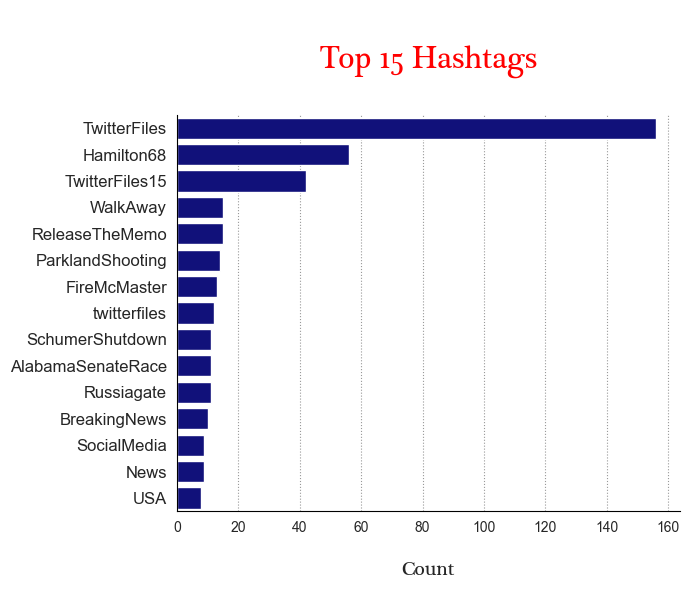

In [14]:
#visualize most frequent hashtags

sns.set_style('whitegrid', {"grid.color": ".6", "grid.linestyle": ":", 'axes.edgecolor': 'Black', 
             'axes.grid': True})

f, axes = plt.subplots(figsize=(7,6))

hashtag_top = 15

hashtag_df = pd.DataFrame({'hashtag': hashtag_list,
                          'hashtag_count': hashtag_count_list}).sort_values\
('hashtag_count', ascending=False)[:hashtag_top]

ax = sns.barplot(data=hashtag_df, y='hashtag', x='hashtag_count', color='DarkBlue')

ax.set(ylabel=None)
ax.set_xlabel('\nCount', fontsize=14, fontweight='bold', fontname="Plantagenet Cherokee")
ax.tick_params(axis='y', labelsize=12)

ax.set_title('\nTop ' + str(hashtag_top) + ' Hashtags\n', fontsize=22,\
         fontweight='bold', fontname="Plantagenet Cherokee", color='Red')


sns.despine()
plt.tight_layout()
# plt.show()

# f.savefig('/.../hashtags.jpg', bbox_inches='tight')

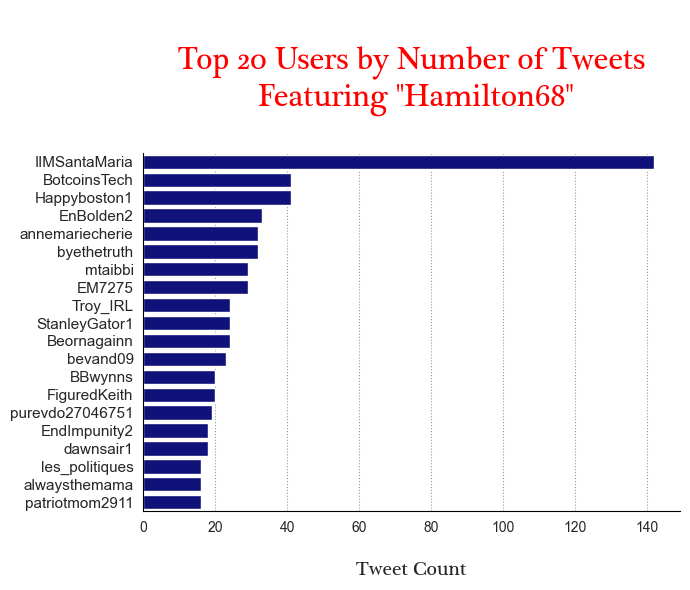

In [15]:
#visualize users most frequently using "Hamilton 68"

f, axes = plt.subplots(figsize=(7,6))

users_top = 20

users_df = pd.DataFrame({'user': users_list,
                          'number_of_posts': users_count_list}).sort_values\
('number_of_posts', ascending=False)[:users_top]

ax = sns.barplot(data=users_df, y='user', x='number_of_posts', color='DarkBlue')

ax.set(ylabel=None)
ax.set_xlabel('\nTweet Count', fontsize=14, fontweight='bold', fontname="Plantagenet Cherokee")
ax.tick_params(axis='y', labelsize=11)

ax.set_title('\nTop ' + str(users_top) + ' Users by Number of Tweets\n Featuring "Hamilton68"\n', fontsize=22,\
         fontweight='bold', fontname="Plantagenet Cherokee", color='Red')


sns.despine()
plt.tight_layout()
# plt.show()

# f.savefig('/.../hashtags.jpg', bbox_inches='tight')

In [16]:
# concat_df[concat_df['date'].between('2023-02-01', '2023-02-02')].head(50)

In [17]:
#determine total engagmeent for each user with tweets containing "Hamilton 68"

user_dict = {'user': [], 'total_engagements': []}

for i in range(len(concat_df)):
    if concat_df.iloc[i, :]['retweetedUser'] == '--':
        if concat_df.iloc[i, :]['user'] not in user_dict['user']:
            user_dict['user'].append(concat_df.iloc[i, :]['user'])
            user_dict['total_engagements'].append(0)
        index = user_dict['user'].index(concat_df.iloc[i, :]['user'])
        user_dict['total_engagements'][index] += concat_df.iloc[i, :]['total_engagements']
    
total_engagements_user_df = pd.DataFrame.from_dict(user_dict).sort_values('total_engagements', ascending=False)

In [18]:
#determine users most frequently engaged with in tweets featuring "Hamilton 68"

engaged_with_counter1 = Counter()
engaged_with_list1 = []
count_list1 = []

def engaged_with_count(df, counter_, list, count_list):
    counter = 0
    for i in df['quotedUser']:
        if i != '--':
            if df['retweetedUser'][counter] == '--':
                counter_.update(i.split())
        counter += 1

    for i in df['retweetedUser']:
        if i != '--':
            counter_.update(i.split())

    for i in df['inReplyToUser']:
        if i != '--':
            counter_.update(i.split())

    for i in counter_.most_common(len(counter_)):
        if len(i[0]) > 2:
            list.append(i[0])
            count_list.append(i[1])
            
engaged_with_count(concat_df, engaged_with_counter1, engaged_with_list1, count_list1)

In [19]:
#integrity checks:

# engaged_with_counter1['KanekoaTheGreat']
# edges_list_engagements_df[edges_list_engagements_df['target']=='KanekoaTheGreat'].count()

In [20]:
#produce nodes and edges tables

source_list = []
host_target_list = []


def sna_list(include_replies):
    for i in range(len(concat_df)):
        if concat_df.iloc[i, :]['retweetedUser'] != '--':
            source_list.append(concat_df.iloc[i, :]['user'])
            host_target_list.append(concat_df.iloc[i, :]['retweetedUser'])
        if concat_df.iloc[i, :]['quotedUser'] != '--':
            if concat_df.iloc[i, :]['retweetedUser'] == '--':
                source_list.append(concat_df.iloc[i, :]['user'])
                host_target_list.append(concat_df.iloc[i, :]['quotedUser'])
        if include_replies=='yes':
            if concat_df.iloc[i, :]['inReplyToUser'] != '--':
                source_list.append(concat_df.iloc[i, :]['user'])
                host_target_list.append(concat_df.iloc[i, :]['inReplyToUser'])
                
sna_list('yes')

id_list = list(set(source_list + host_target_list))

nodes_list_engagements_df = pd.DataFrame({'id': id_list,
                                  'label': id_list})
edges_list_engagements_df = pd.DataFrame({'source': source_list,
                                     'target': host_target_list})

# nodes_list_engagements_df.to_csv('/.../hamliton68_engagements_nodes.csv', sep=',', index=False)
# edges_list_engagements_df.to_csv('/...hamilton68_engagements_edges.csv', sep=',', index=False)

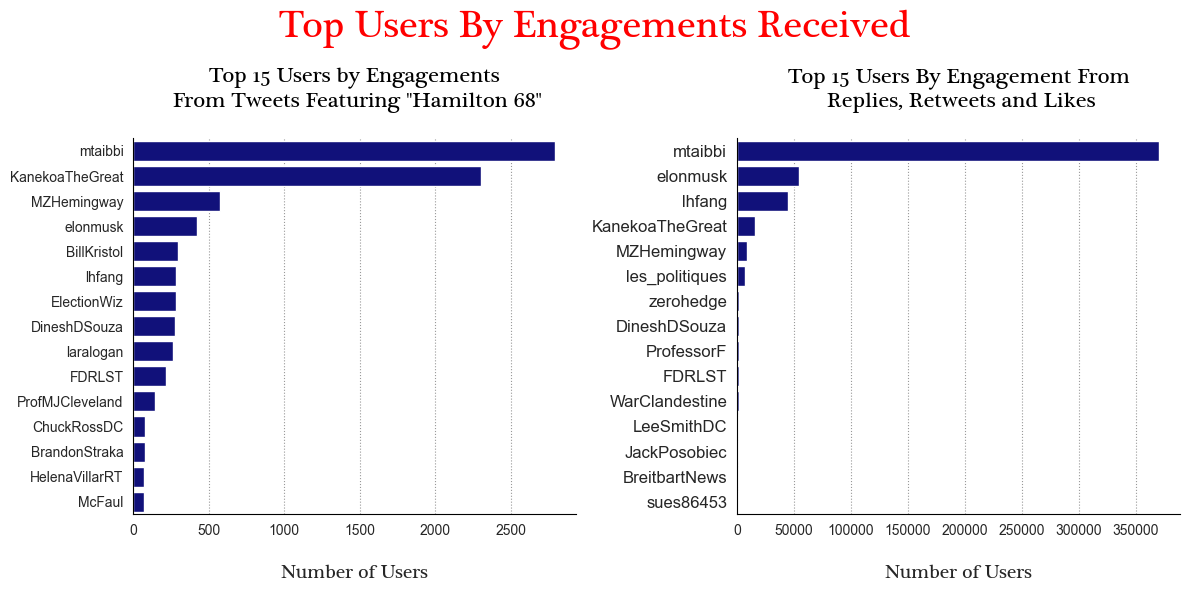

In [21]:
#visualize users most frequently engaged with in tweets featuring "Hamilton 68"

f, axes = plt.subplots(1,2, figsize=(12,6))

engaged_with_top = 15

engagements_from_df = pd.DataFrame({'user': engaged_with_list1,'number_of_posts': count_list1}).sort_values\
('number_of_posts', ascending=False)[:engaged_with_top]

ax1 = sns.barplot(data=engagements_from_df, y='user', x='number_of_posts', color='DarkBlue', ax=axes[0])

engagement_top = 15

total_engagements_user_df2 = pd.DataFrame.from_dict(user_dict).sort_values\
('total_engagements', ascending=False)[:engagement_top]

ax2 = sns.barplot(data=total_engagements_user_df2, y='user', x='total_engagements', color='DarkBlue', ax=axes[1])


ax1.set(ylabel=None)
ax1.set_xlabel('\nNumber of Users', fontsize=14, fontweight='bold', fontname="Plantagenet Cherokee")
ax1.tick_params(axis='y', labelsize=10)
ax1.set_title('Top ' + str(engaged_with_top) + ' Users by Engagements\n From Tweets Featuring\
 "Hamilton 68"\n', fontsize=16, fontweight='bold', fontname="Plantagenet Cherokee", color='Black')

ax2.set(ylabel=None)
ax2.set_xlabel('\nNumber of Users', fontsize=14, fontweight='bold', fontname="Plantagenet Cherokee")
ax2.tick_params(axis='y', labelsize=12)
ax2.set_title('Top ' + str(engagement_top) + ' Users By Engagement From\n \
Replies, Retweets and Likes\n', fontsize=16, fontweight='bold', fontname="Plantagenet Cherokee", color='Black')

f.suptitle('Top Users By Engagements Received', fontsize=28, fontweight='bold', color='Red', \
          fontname="Plantagenet Cherokee")

sns.despine()
plt.tight_layout()
# plt.show()

# f.savefig('/.../hashtags.jpg', bbox_inches='tight')

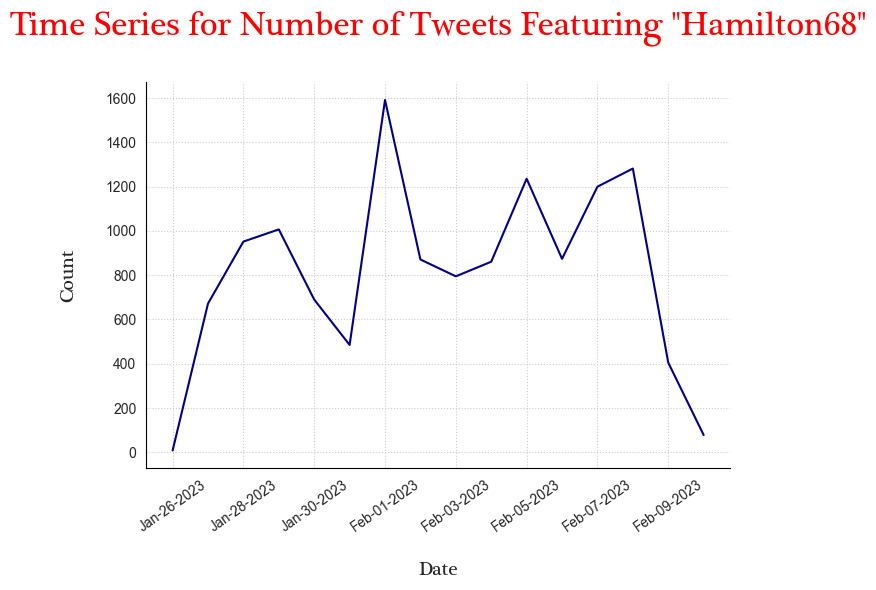

In [22]:
#visualize time series for occurrence of "Hamilton 68"
sns.set_style('whitegrid', {"grid.color": ".8", "grid.linestyle": ":", 'axes.edgecolor': 'Black', 
             'axes.grid': True})

f, axes = plt.subplots(figsize=(7,6))

# users_top = 20

#resample to determine activity over time
resampled_df = concat_df['url'].resample('d').count().to_frame()
resampled_df.rename(columns={'url': 'count'}, inplace=True)
resampled_df['date'] = resampled_df.index
resampled_df = resampled_df[['date', 'count']]


ax = sns.lineplot(data=resampled_df, x=resampled_df['date'], y=resampled_df['count'], color='DarkBlue')

ax.set(ylabel=None)
ax.set_xlabel('\nDate', fontsize=14, fontweight='bold', fontname="Plantagenet Cherokee")
ax.set_ylabel('Count\n', fontsize=14, fontweight='bold', fontname="Plantagenet Cherokee")
ax.tick_params(axis='y', labelsize=10)
ax.tick_params(axis='x', rotation=35)

ax.set_title('Time Series for Number of Tweets Featuring "Hamilton68"\n', fontsize=24,\
         fontweight='bold', fontname="Plantagenet Cherokee", color='Red')

import matplotlib.dates as mdates
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d-%Y'))

sns.despine()
plt.tight_layout()
# plt.show()

# f.savefig('/.../hashtags.jpg', bbox_inches='tight')

In [23]:
#create lists for top links

links_list = []
links_count_list = []
links_counter = Counter()

for i in concat_df['links']:
    if i == '8.News' or i == '15.It':
        continue
    else:
        links_counter.update(i.split())
    
for i in links_counter:
    links_list.append(i)
    links_count_list.append(links_counter[i])

In [24]:
#produce nodes and edges tables for links

host_source_list = []
host_target_list = []
host_type_list = []

for i in range(len(concat_df)):
    if concat_df.iloc[i, :]['links'] != '--':
            if concat_df.iloc[i, :]['links'] != '8.News':
                    if concat_df.iloc[i, :]['links'] != '15.It':
                        host_source_list.append(concat_df.iloc[i, :]['user'])
                        host_target_list.append(concat_df.iloc[i, :]['links'])

host_id_list = list(set(host_source_list + host_target_list))

for i in host_id_list:
    if i in host_target_list:
        host_type_list.append('host')
    else:
        if i in host_source_list:
            host_type_list.append('user')

host_nodes_list_df = pd.DataFrame({'id': host_id_list,
                                  'label': host_id_list,
                                  'type': host_type_list})
host_edges_list_df = pd.DataFrame({'source': host_source_list,
                                     'target': host_target_list})

# host_nodes_list_df.to_csv('/...hamilton68_host_nodes.csv', sep=',', index=False)
# host_edges_list_df.to_csv('/...hamilton68_host_edges.csv', sep=',', index=False)

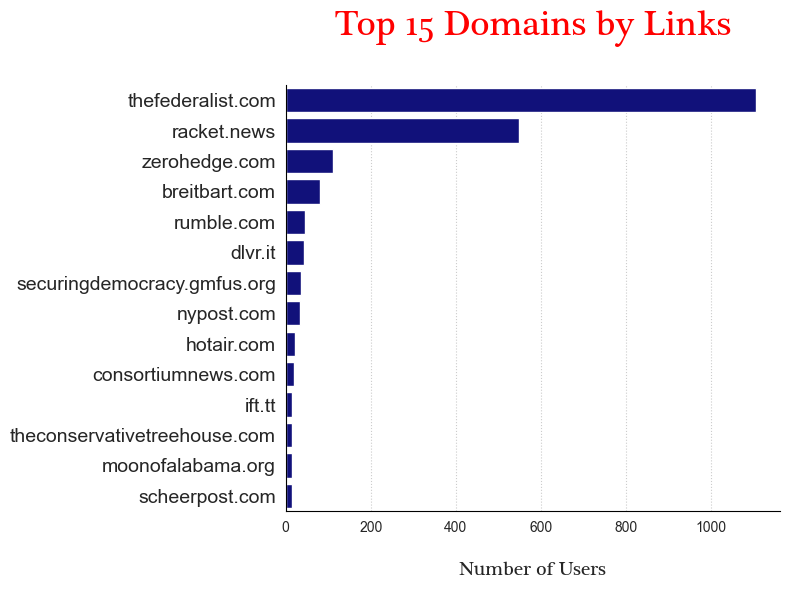

In [25]:
#visualize most popular links

f, axes = plt.subplots(figsize=(8,6))

links_top = 15

links_df = pd.DataFrame({'link': links_list,
                        'links_count': links_count_list}).sort_values('links_count', ascending=False)[1:links_top]

ax = sns.barplot(data=links_df, y='link', x='links_count', color='DarkBlue')

ax.set(ylabel=None)
ax.set_xlabel('\nNumber of Users', fontsize=14, fontweight='bold', fontname="Plantagenet Cherokee")
ax.tick_params(axis='y', labelsize=14)
ax.set_title('Top ' + str(links_top) + ' Domains by Links\n', fontsize=26, fontweight='bold', fontname="Plantagenet Cherokee", color='Red')

sns.despine()
plt.tight_layout()
# plt.show()

# f.savefig('/.../hashtags.jpg', bbox_inches='tight')